# The Normal Distribution, Standard Normal Distribution, Standard Scores, and One-Sample z-tests

# Normal distribution 


## What are the parameters that characterize the normal distribution? What is the empirical rule? 

A: The normal distribution is characterized by two parameters, $\mu$ and $\sigma$, which correspond to the mean of the distribution and the standard deviation of the distribution, respectively. The mean, $\mu$, is a measure of the central tendency of the distribution, and the standard deviation $\sigma$ measures the spread of the data about this mean. 

The empirical rule states that 68% of the data in a normal distribution is to be found 1 standard deviation away from the mean, 95% of the data is found within 2 standard deviations from the mean, and 99.7% of the data can be found within 3 standard deviations from the mean. The empirical rule is also known as the 68-95-99.7 rule for this reason. If we have a data point whose value is more than 3 standard deviations away from the mean, we can tell that the probability of occurrence of that value is low, and can deem this dataset as interesting or as an outlier, depending on the analysis question at hand. 

## Creating normal distributions with numpy and visualizing them

Use `numpy` to create a normal distribution containing 1000 values with mean $\mu = 20$ and standard deviation $\sigma = 0.5$

In [1]:
# solution
import numpy as np

mu, sigma = 20, 0.5
n = 1000

s = np.random.normal(mu, sigma, n)

Create a normalized histogram for this distribution using `matplotlib`

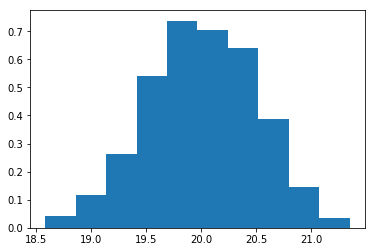

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 

n, bins, _ = plt.hist(s, density=True)

Use seaborn to visualize the distribution and plot the KDE

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


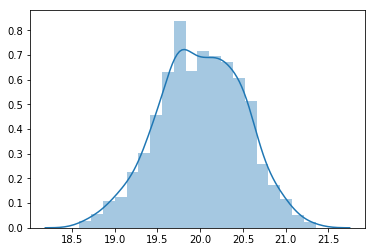

In [3]:
import seaborn as sns
sns.distplot(s, kde=True)

# Standard normal distributions 

## Compare and contrast the normal distribution and the standard normal distribution. What is the empirical rule for the standard normal distribution? 

A: The standard normal distribution is a special case of the normal distribution. It is a normal distribution with a mean of 0 and standard deviation of 1. 

The empirical rule for the standard normal distribution is as follows: 
* 68% of the area under the standard normal distribution lies between -1 and 1 
* 95% of the area under the standard normal distribution lies between -2 and 2
* 99.7% of the area under the standard normal distribution lies between -3 and 3

## How do you standardize a normal distribution? 

A: To standardize normally distributed data you first subtract the mean of the data from each point and then divide this difference by the data's standard deviation. 

## Standardize the distribution you created above and use seaborn to visualize the distribution and plot the KDE

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


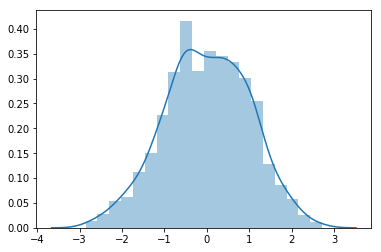

In [4]:
standard_s = (s - np.mean(s))/np.std(s)

sns.distplot(standard_s, kde=True)

# Standard score (z-score)

## Why is the standard score a useful statistic? 

> A: The z-score let's us compute the probability of a score occurring in a normal distribution and allows us to compare scores from different normal distributions. 

## Let's use a real-world dataset. 

Let's look at Combined Cycle Power Plant dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant). The dataset contains 9568 observations collected from a combined cycle power plant over a period of six years. Features in the dataset consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V), and the net hourly electrical energy output (EP) of the plant. 

We'll look at the ambient pressure (AP) variable, which is measured in units of millibars. 

In [5]:
# Load the data into a dataframe 
import pandas as pd 
df = pd.read_excel('Folds5x2_pp.xlsx')
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Use seaborn to visualize the distribution of the ambient pressure (`AP`) feature and plot the KDE. 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


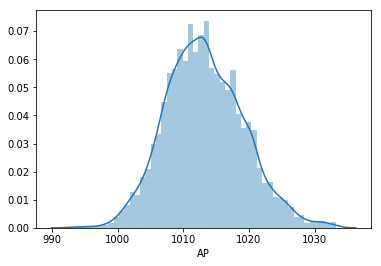

In [6]:
sns.distplot(df['AP'], kde=True)

What is the mean ambient pressure and what is the standard deviation of the ambient pressure? 

In [7]:
mu = df['AP'].mean()
sigma = df['AP'].std()

In [8]:
mu, sigma

(1013.2590781772575, 5.938783705811607)

Standardize the distribution of ambient pressure observations and create a visualization. 

In [9]:
std_ambient_pressure = (df['AP'].values - mu)/sigma

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


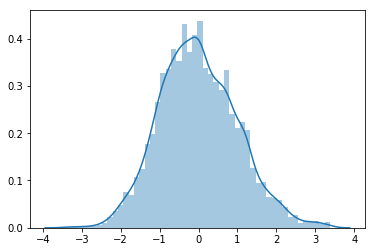

In [10]:
sns.distplot(std_ambient_pressure,kde=True)

What is the z-score corresponding to an observed ambient pressure of 1025 millibars? Interpret the result. 

In [11]:
def get_zscore(value, mean, std):
    return (value-mean)/std

In [12]:
get_zscore(1025, mu, sigma)

1.9769909807041823

> The standard score corresponding to an observation of 1025 millibars is 1.98. The observed ambient pressure is almost 2 standard deviations above the mean ambient pressure. 

Suppose an observation of ambient pressure has a z-score of -2. Interpret this z-score. What is the observed ambient pressure? 

In [13]:
def get_value_from_zscore(z, mean, std):
    return z*std + mean

> The observed ambient pressure is 2 standard deviations below the mean ambient pressure. 

In [15]:
get_value_from_zscore(-2, mu, sigma)

1001.3815107656343

> A standard score of -2 corresponds to an ambient pressure of 1001.4 millibars. 